In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy.stats import zscore, pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import networkx as nx
from sklearn.decomposition import PCA
plt.rcParams.update({'font.size': 20})

# Atelier: Analyse de réseaux - Épidémiologie

Animé par: Antoine Légaré et Gabriel Genest

In [2]:
class Epidemic:
    
    def __init__(self, N, I_0=1, p_infection=0.1, p_recovery=0.01):
        self.N = N
        self.I_0 = I_0
        self.p_recovery = p_recovery
        self.p_infection = p_infection
        self.status = np.expand_dims(np.array([0] * N), axis=1)
        self.status[:I_0, 0] = 1
        np.random.shuffle(self.status)
        self.A = np.zeros((N, N)) 
        
    def initiateContacts(self, adjacencyMatrix):
        self.A = adjacencyMatrix
    
    def simulate(self, duration):
        T = int(duration)
        status = np.zeros((self.N, T)).astype('int')
        status[:, 0] = self.status[:, -1]
        for i in range(1, T):
            infectedPeople = status[:, i - 1] == 1
            status[infectedPeople, i] = 1
            infectedContacts = self.p_infection * (self.A @ status[:, i-1])
            immuneResponse = np.random.uniform(0, 1, self.N)
            infections = infectedContacts > immuneResponse
            status[infections, i] = 1
            condition1 = np.random.uniform(0, 1, self.N) > (1 - self.p_recovery)
            condition2 = (status[:, i - 1] == 1)
            recoveries = condition1 & condition2
            status[recoveries, i] = 0
        self.status = np.append(self.status, status[:, 1:], axis=1)

In [3]:
def WSNetwork(N, k, p):
    G = nx.watts_strogatz_graph(N, k, p)
    matrix = nx.to_numpy_array(G)
    return matrix

In [4]:
N = 1000
epidemic = Epidemic(N, I_0=100, p_infection=0.015, p_recovery=0.1)
epidemic.initiateContacts(WSNetwork(N, 10, 0.2))
epidemic.simulate(2500)

Text(0, 0.5, 'Fraction of infected people')

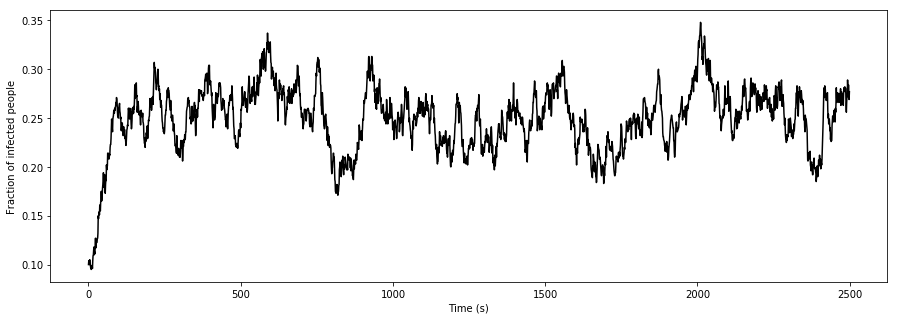

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(np.mean(epidemic.status, axis=0), color='black')
plt.xlabel('Time (s)')
plt.ylabel('Fraction of infected people')

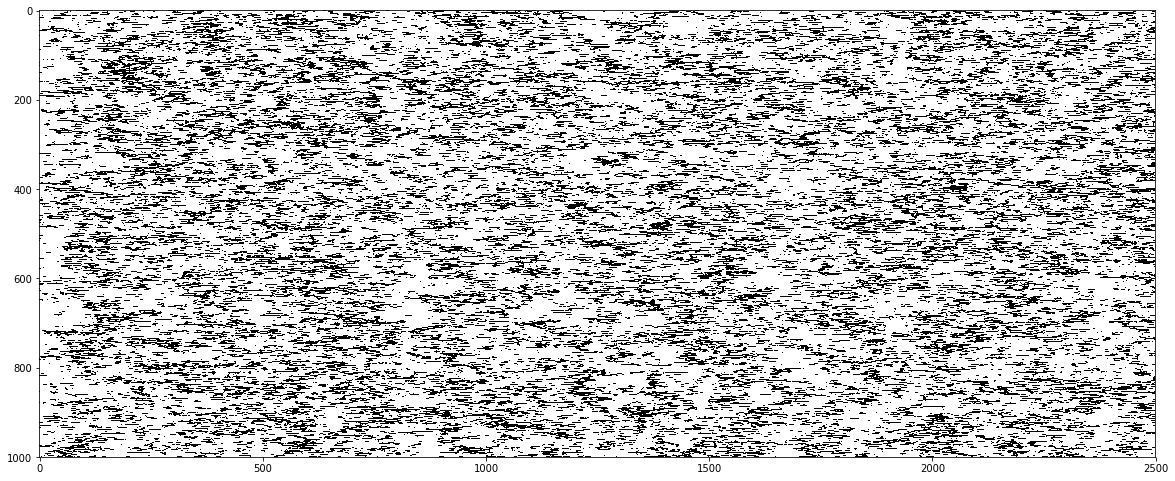

In [6]:
plt.figure(figsize=(20, 10))
plt.imshow(epidemic.status, cmap='binary')